In [148]:
# packages ------
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, model_selection, metrics

plt.style.use('ggplot')
import scipy.stats as stats
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

In [208]:
df = pd.read_csv("C:\\Users\\amiao\\Google Drive\\Study\\GA\\datasets\\dataset-energy-efficiency.csv")


In [209]:
df.columns

Index(['RC', 'SA', 'WA', 'RA', 'OH', 'OR', 'GA', 'GAD', 'HL', 'CL'], dtype='object')

In [210]:
df.describe()

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [91]:
np.sum(np.isnan(df))

RC     0
SA     0
WA     0
RA     0
OH     0
OR     0
GA     0
GAD    0
HL     0
CL     0
dtype: int64

In [211]:
df.corr()

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
RC,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
SA,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
WA,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
RA,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
OH,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
OR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
GA,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
GAD,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
HL,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
CL,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


In [218]:
X = df.loc[:, ('RC','WA','OH','GA','GAD')] # X is a DataFrame
#X = sm.add_constant(X)  # add a constant
y = df.HL # y is a Series

In [219]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, train_size = .80)

In [220]:
train_X.shape

(614, 5)

In [221]:
train_X.corr()

,RC,WA,OH,GA,GAD
RC,1.000000,-0.216113,0.830428,0.004415,0.013714
WA,-0.216113,1.000000,0.264215,0.030447,-0.010266
OH,0.830428,0.264215,1.000000,0.028806,0.012298
GA,0.004415,0.030447,0.028806,1.000000,0.250702
GAD,0.013714,-0.010266,0.012298,0.250702,1.000000


In [222]:
for col_name in df.columns:
    
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col_name] > (Q1 - 1.5 * IQR)) & (df[col_name] < (Q3 + 1.5 * IQR))]


In [223]:
model = smf.OLS(train_y, train_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HL   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     7969.
Date:                Mon, 21 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:44:08   Log-Likelihood:                -1548.0
No. Observations:                 614   AIC:                             3106.
Df Residuals:                     609   BIC:                             3128.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RC           -28.1783      1.093    -25.769      0.000       -30.326   -26.031
WA             0.0165      0.002      8.992      0.000         0.013     0.020
OH             6.3647      0.102     62.295      0.000         6.164     6.565
GA            19.7201      0.940     20.970      0.000        17.873    21.567
GAD            0.1930      0.080      2.405      0.016         0.035     0.351
==============================================================================
Omnibus:                       17.824   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.495
Skew:                          -0.366   Prob(JB):                     5.84e-05
Kurtosis:                       3.475   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

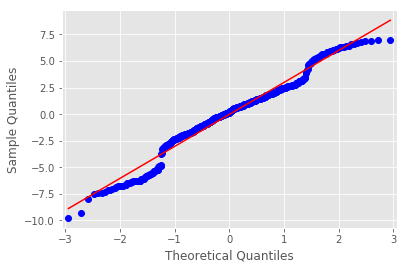

In [224]:
model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))   #plot residuals
sm.qqplot(model.resid, line = 's')


In [226]:
train_X, test_X, train_y, test_y
predict_X = test_X
#predict_X = sm.add_constant(predict_X)
predict_y = model.predict(predict_X)


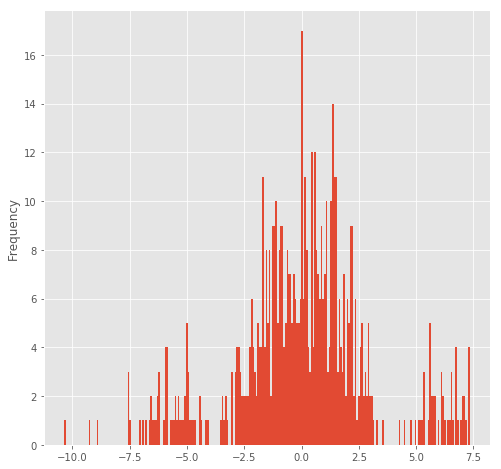

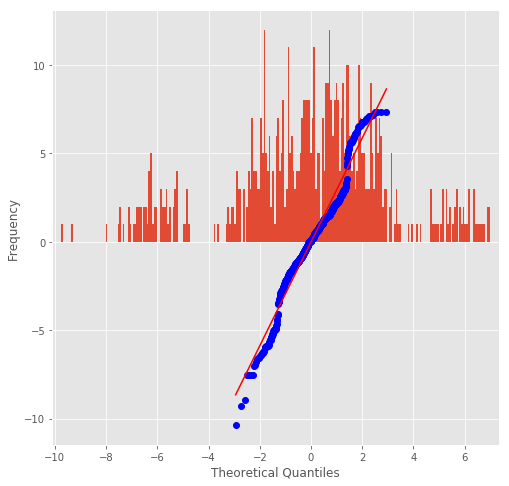

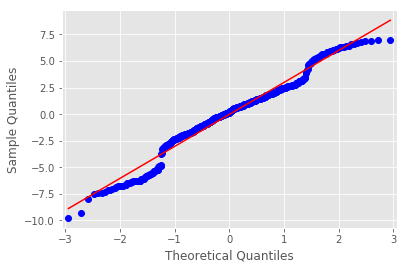

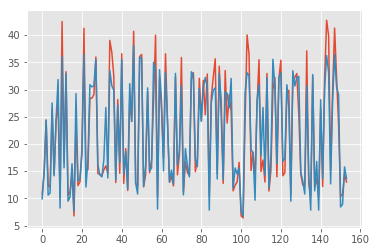

In [227]:
plt.figure()
#plt.xlim((.min(), xs.max()))
#plt.ylim((0, 1))
plt.plot(list(range(0,len(test_y))),test_y, label = 'test')
plt.plot(list(range(0,len(test_y))),predict_y, label = 'predict')
plt.show()

In [228]:
model_skl = smf.ols(formula = 'HL ~ 0 + RC + WA + OH + GA + GAD', data = df).fit()

model_skl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HL   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     7718.
Date:                Mon, 21 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:44:46   Log-Likelihood:                -1793.1
No. Observations:                 704   AIC:                             3596.
Df Residuals:                     699   BIC:                             3619.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RC           -26.6822      1.248    -21.381      0.000       -29.132   -24.232
WA             0.0148      0.002      7.317      0.000         0.011     0.019
OH             6.2856      0.107     58.646      0.000         6.075     6.496
GA            18.9447      0.897     21.119      0.000        17.184    20.706
GAD            0.1769      0.077      2.296      0.022         0.026     0.328
==============================================================================
Omnibus:                       13.847   Durbin-Watson:                   0.572
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.251
Skew:                          -0.232   Prob(JB):                     0.000179
Kurtosis:                       3.610   Cond. No.                     3.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

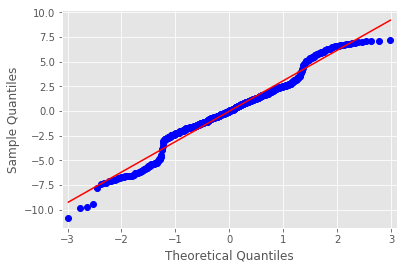

In [229]:
sm.qqplot(model_skl.resid, line = 's')


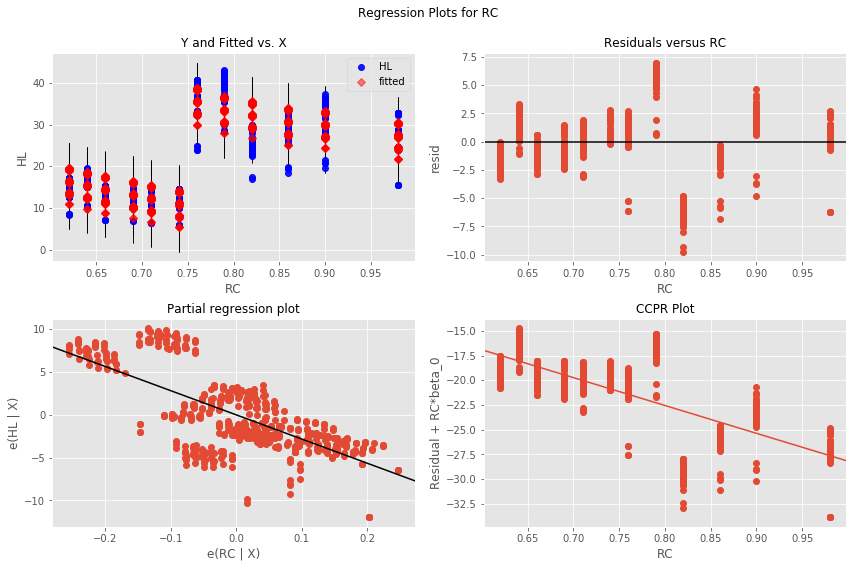

In [230]:
sm.graphics.plot_regress_exog(model, 'RC', fig = plt.figure(figsize = (12, 8)))


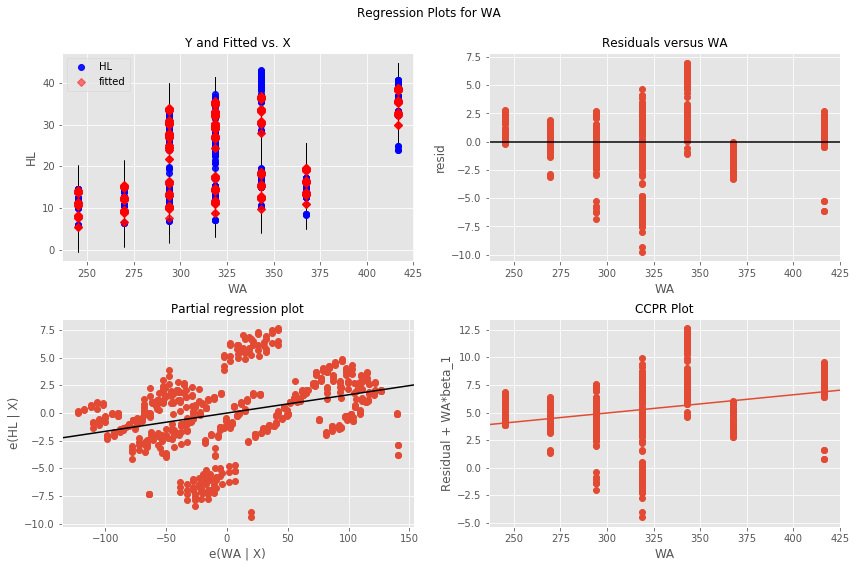

In [231]:
sm.graphics.plot_regress_exog(model, 'WA', fig = plt.figure(figsize = (12, 8)))


In [190]:
class LassoPolynomial(object):
    def __init__(self, alpha, n):
        self.features = preprocessing.PolynomialFeatures(n)
        self.model = linear_model.Lasso(alpha)

    def fit(self, X, y):
        self.X = X
        self.features.fit(X)

        X = self.features.transform(X)
        self.model.fit(X, y)

        return self

    def predict(self, X):
        X = self.features.transform(X)
        return self.model.predict(X)

    def score(self, X, y):
        X = self.features.transform(X)
        return self.model.score(X, y)

    def mean_squared_error(self, X, y):
        y_hat = self.predict(X)
        return metrics.mean_squared_error(y_hat, y)

    def complexity(self):
        return np.sum(np.abs(self.model.coef_))

In [192]:
alphas = [1e-1, 1e-2, 1e-3, 1e-5, 1e-7, 1e-9, 1e-11]

models = [LassoPolynomial(alpha, 1).fit(train_X, train_y) for alpha in alphas]
#train_X, test_X, train_y, test_y


In [203]:
model_df = pd.DataFrame({'alpha': alphas, 'model': models})
model_df['R^2 (train)'] = model_df.model.apply(lambda model: model.score(train_X, train_y))
model_df['R^2 (test)'] = model_df.model.apply(lambda model: model.score(test_X, test_y))
model_df['Complexity'] = model_df.model.apply(lambda model: model.complexity())

model_df.drop('model', axis = 1).set_index('alpha')

,R^2 (train),R^2 (test),Complexity
alpha,,,
1.000000e-01,0.899680,0.921843,19.179446
1.000000e-02,0.909053,0.922142,30.467479
1.000000e-03,0.910656,0.921029,39.312763
1.000000e-05,0.910733,0.920821,40.300661
1.000000e-07,0.910734,0.920819,40.310545
1.000000e-09,0.910734,0.920819,40.310644
1.000000e-11,0.910734,0.920819,40.310645


In [235]:
models[1].model.coef_

array([  0.        ,   0.        ,  -5.76522876,   0.04508247,
         5.09438461,  19.35255631,   0.21022729])